<a href="https://colab.research.google.com/github/SJones339/XGBoost-and-ANN/blob/main/IMPANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse

import GEOparse
import pandas as pd

# Download and parse the GEO dataset
gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.5/278.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GEOparse: filename=GEOparse-2.0.3-py3-none-any.whl size=29046 sha256=782293297b513caa84c2a0ffc3f4827279df412c70c6a698b81ebcae9e77fcea
  Stored in directory: /root/.cache/pip/wheels/14/96/7a/2ccb3a2a9e6f57b1c758b4ced8445fad36bba011bcebb2775f
Successfully built GEOparse


07-Mar-2024 00:20:44 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
07-Mar-2024 00:20:44 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz to ./GSE46699_family.soft.gz
100%|██████████| 69.4M/69.4M [00:00<00:00, 85.8MB/s]
07-Mar-2024 00:20:45 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
07-Mar-2024 00:20:45 DEBUG downloader - Moving /tmp/tmpg59clalx to /content/GSE46699_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpg59clalx to /content/GSE46699_family.soft.gz
07-Mar-2024 00:20:45 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46699/soft/GSE46699_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE46nnn/GSE46

In [25]:
import GEOparse
import pandas as pd

# Download the dataset
gse = GEOparse.get_GEO(geo="GSE46699", destdir="./")

# Create separate lists for the identifiers
tissue_list = []
smoking_list = []
obesity_list = []

#Appending each value to the corresponding list. Tissue (tumor = 1, normal = 0). Smoking (Smoker = 1, non-smoker = 0). Obesity (obese = 1, not obese = 0)
for gsm_name, gsm in gse.gsms.items():
    for key, value in gsm.metadata.items():
        if key == 'characteristics_ch1':

            tissue_list.append(1 if 'tumor' in value[1] else 0)

            smoking_list.append(1 if 'yes' in value[2] else 0)

            obesity_list.append(1 if 'yes' in value[3] else 0)

# Create an empty DataFrame to store the merged gene expression data
merged_table = pd.DataFrame()

# Iterate through each GSM entry and concatenate its gene expression data to the merged DataFrame
for gsm_name, gsm in gse.gsms.items():
    # Extract gene expression data from the current GSM entry
    gsm_data = gsm.table["VALUE"]

    # Add gene expression data to the merged DataFrame, using the GSM name as the column name
    merged_table[gsm_name] = gsm_data



07-Mar-2024 00:59:57 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
07-Mar-2024 00:59:57 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
07-Mar-2024 00:59:57 INFO GEOparse - Parsing ./GSE46699_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE46699_family.soft.gz: 
07-Mar-2024 00:59:57 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
07-Mar-2024 00:59:57 DEBUG GEOparse - SERIES: GSE46699
DEBUG:GEOparse:SERIES: GSE46699
07-Mar-2024 00:59:57 DEBUG GEOparse - PLATFORM: GPL570
DEBUG:GEOparse:PLATFORM: GPL570
/usr/local/lib/python3.10/dist-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
07-Mar-2024 00:59:59 DEBUG GEOparse - SAMPLE: GSM1134764
DEBUG:GEOparse:SAMPLE: GSM1134764
07-Mar-2024 00:59:59 DEBUG GEOpars

In [17]:
# Transpose the merged DataFrame to have samples as rows and genes as columns
merged_table = merged_table.T

# Reset index to ensure proper alignment
merged_table.reset_index(drop=True, inplace=True)


# Create metadata DataFrame
metadata_df = pd.DataFrame({
    'Tissue': tissue_list,
    'Smoking': smoking_list,
    'Obesity': obesity_list
})


# Convert categorical labels to numerical values
metadata_df['Tissue'] = metadata_df['Tissue'].astype(int)
metadata_df['Smoking'] = metadata_df['Smoking'].astype(int)
metadata_df['Obesity'] = metadata_df['Obesity'].astype(int)


# Display DataFrames
print("Gene Expression DataFrame:")
print(merged_table.head())

print("\nMetadata DataFrame:")
print(metadata_df.head())

Gene Expression DataFrame:
       0         1         2          3         4         5         6      \
0  10.654552  5.104113  5.372776  11.908765  3.500414  7.154525  5.504916   
1   9.812106  5.776783  6.422235  11.142645  3.524682  7.052937  5.107343   
2   9.919435  4.628159  5.636217  11.073223  3.479632  7.034347  5.515835   
3  10.735899  6.154403  6.539063  10.490871  3.499183  7.313254  5.442788   
4  10.106417  4.827499  5.668851  11.194256  3.476190  7.254072  5.384006   

      7         8         9      ...      54665      54666      54667  \
0  4.566332  3.965394  3.626812  ...  12.976318  12.576612  14.005180   
1  3.979149  4.313247  3.709840  ...  12.970404  12.676054  14.025714   
2  4.058720  4.498216  3.611606  ...  13.120821  12.666887  13.972896   
3  4.055170  7.589755  3.683939  ...  12.482544  12.094553  13.794694   
4  4.089374  4.762130  3.661195  ...  13.353682  12.934197  14.044545   

       54668     54669     54670     54671      54672      54673      5

In [ ]:
print(merged_table.shape)
print(len(tissue_list))
tissue_list


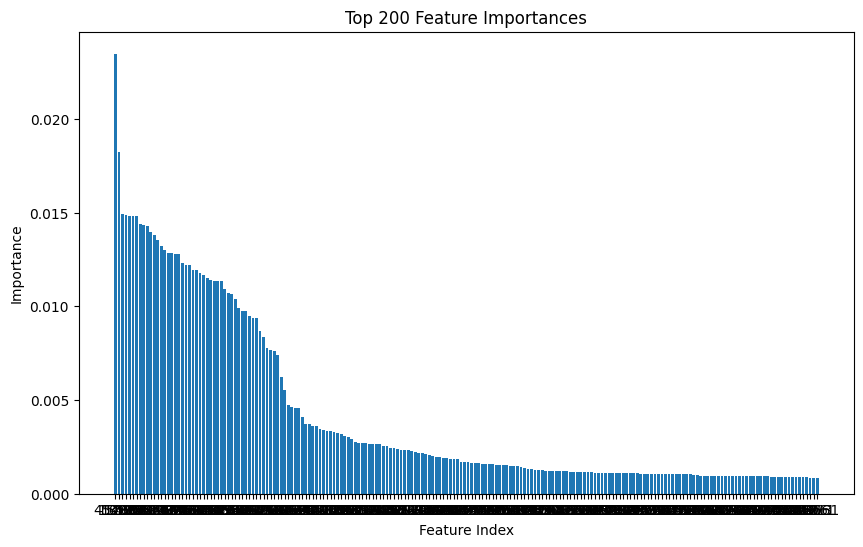

Shape of final merged table: (130, 200)
      45483      15500      10874     12684     31150     362        17091  \
0  8.567932  11.922966  11.570937  6.440426  7.774815  4.684100  10.482700   
1  3.728749   4.326168  13.719112  6.802861  9.102039  3.078681   5.962734   
2  5.883850  11.627946  11.957684  6.355463  6.946724  3.824468   7.968440   
3  3.958715   4.084709  13.597791  7.459687  9.001148  2.906016   5.983204   
4  5.725384  10.550046  11.519476  6.372461  7.354117  3.571413   8.202290   

      363       36860     13569  ...     10932     1497      25509     40458  \
0  7.834615  4.386181  5.212095  ...  8.691720  3.543521  3.866037  2.983267   
1  3.375872  6.748918  7.591473  ...  8.652103  3.985651  3.866296  3.021859   
2  7.159188  4.291880  5.776985  ...  8.581813  3.794836  3.727162  2.946774   
3  3.353441  6.493718  9.295045  ...  8.604372  3.770884  3.798016  2.918483   
4  5.803069  4.628664  5.818548  ...  8.480659  3.621044  3.803829  2.970162   

      3235

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Using the trees classifer to select the most important features of the 50000+
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(merged_table, tissue_list)
importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
sorted_idx = importances.argsort()[::-1][:200]  # Select and plot the top 200 features
plt.bar(range(len(sorted_idx)), importances[sorted_idx])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Top 200 Feature Importances')
plt.xticks(range(len(sorted_idx)), sorted_idx)
plt.show()

# Select top 200 most important features to be part of a new merged_table that will be used in analysis
top_features_idx = importances.argsort()[::-1][:200]
final_merged_table = merged_table.iloc[:, top_features_idx]



# Display this final merged table of the most important features
print("Shape of final merged table:", final_merged_table.shape)
print(final_merged_table.head())



Where red represents cancerous nodes and green represents normal nodes


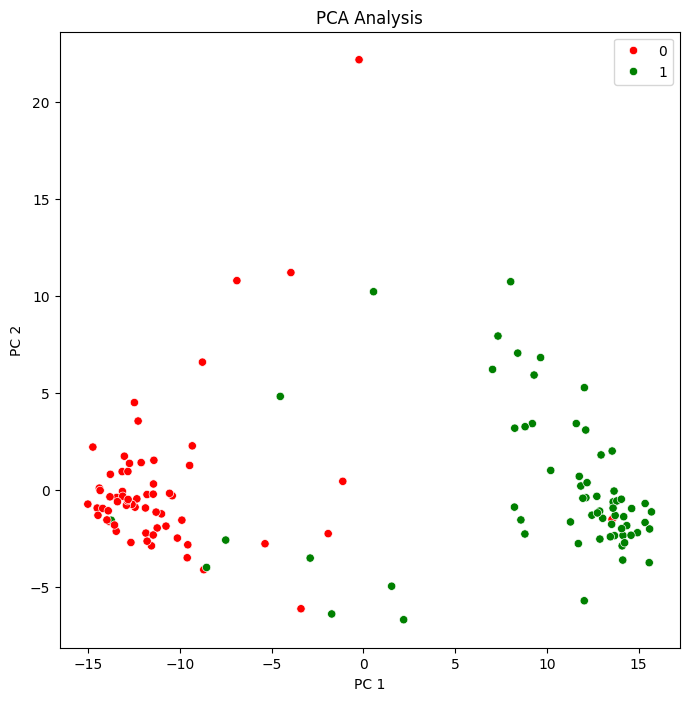

,45483,15500,10874,12684,31150,362,17091,363,36860,13569,...,40458,32356,7481,40406,15313,34211,13661,Smoking,Obesity,Tissue
0,2.172792,1.040515,-0.947501,-0.598058,-0.966088,1.118433,3.009333,1.298459,-1.132837,-1.445487,...,0.343295,-0.078609,-0.795964,0.212486,-1.757446,0.335054,-1.190720,0.0,0.0,0.0
1,-1.251060,-1.032043,0.944425,-0.077486,0.308104,-0.934016,-0.914466,-1.035483,1.430134,-0.014147,...,0.762361,-0.600015,-0.065139,2.371206,0.280455,1.360285,0.333166,0.0,0.0,1.0
2,0.273732,0.960027,-0.606888,-0.720093,-1.761092,0.019435,0.826695,0.944905,-1.235130,-1.105671,...,-0.052965,-0.029269,-1.283283,-0.129731,-1.210045,-1.097529,-1.073446,1.0,0.0,0.0
3,-1.088353,-1.097918,0.837576,0.865928,0.211244,-1.154761,-0.896696,-1.047224,1.153307,1.010654,...,-0.360168,0.664712,0.479008,0.912620,-1.005967,0.081316,0.147888,1.0,0.0,1.0
4,0.161613,0.665955,-0.992823,-0.695678,-1.369977,-0.304083,1.029701,0.235040,-0.869804,-1.080669,...,0.200998,-0.524073,-0.299694,-0.830475,0.242145,-1.159764,-0.807417,0.0,0.0,0.0


In [24]:
# PCA analysis
pca = PCA(n_components=4)
scores = pca.fit_transform(final_merged_table)

# Plot PCA scores
print("Where red represents cancerous nodes and green represents normal nodes")
plt.figure(figsize=(8, 8))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1], hue=tissue_list, palette={0: 'red', 1: 'green'})
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Analysis')
plt.legend()
plt.show()

# Use Scalar to normalize values. Add the smoking, obesity, and tissue labels to the dataframe, and convert all to floats.
scaler = StandardScaler()
final_merged_table_scaled = scaler.fit_transform(final_merged_table)
final_merged_table_scaled_df = pd.DataFrame(final_merged_table_scaled, columns=final_merged_table.columns)

final_merged_table_scaled_df['Smoking'] = metadata_df['Smoking']
final_merged_table_scaled_df['Obesity'] = metadata_df['Obesity']
final_merged_table_scaled_df['Tissue'] = metadata_df['Tissue']

final_merged_table_scaled_df[['Smoking', 'Obesity', 'Tissue']] = final_merged_table_scaled_df[['Smoking', 'Obesity', 'Tissue']].astype(float)

final_merged_table_scaled_df.head()

Separation in PCA is good. Now let's create an Artificial Neural Network Model with arbitrary parameters (no hyperparameter tuning).

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Split data into features (X) and target (y)
X = final_merged_table.values
y = final_merged_table_scaled_df['Tissue'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Define the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(200,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

Epoch 1/10
3/3 [==============================] - 2s 203ms/step - loss: 1.0934 - accuracy: 0.5694 - val_loss: 0.4201 - val_accuracy: 0.7895
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 0.5735 - accuracy: 0.6944 - val_loss: 0.2068 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 36ms/step - loss: 0.3633 - accuracy: 0.7778 - val_loss: 0.1775 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 39ms/step - loss: 0.2842 - accuracy: 0.9028 - val_loss: 0.2094 - val_accuracy: 0.9474
Epoch 5/10
3/3 [==============================] - 0s 42ms/step - loss: 0.2169 - accuracy: 0.9444 - val_loss: 0.1198 - val_accuracy: 0.9474
Epoch 6/10
3/3 [==============================] - 0s 45ms/step - loss: 0.1668 - accuracy: 0.9444 - val_loss: 0.1134 - val_accuracy: 0.9474
Epoch 7/10
3/3 [==============================] - 0s 42ms/step - loss: 0.1674 - accuracy: 0.9444 - val_loss: 0.0937 - val_accuracy: 0.9474
Epoch 8/10
3/3 [==========

Plot the Loss over each epoch

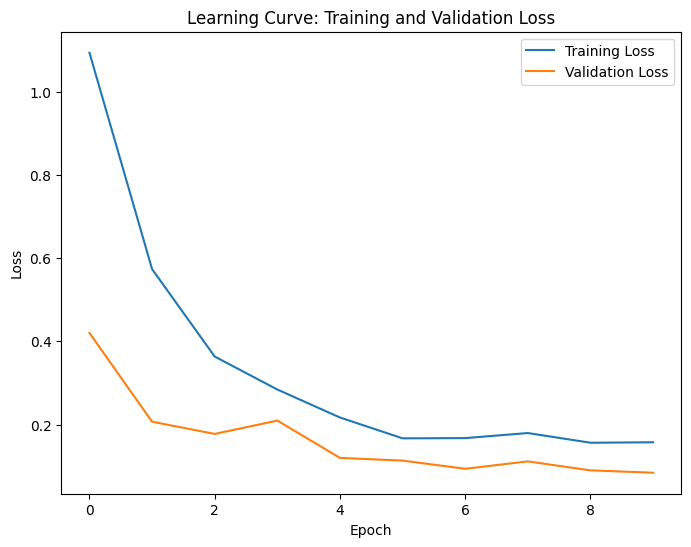

2/2 [==============================] - 0s 12ms/step - loss: 0.2219 - accuracy: 0.9487
Test accuracy: 0.9487179517745972


In [13]:
# Extract training and validation loss from history
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve: Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')